In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from plotting import *
from GradientDescent import Plain, Stochastic
import utils

In [3]:
n = 100
degree = 2
x = np.linspace(0, 1, n)

X = np.empty((n, degree+1))
X[:,0] = 1
X[:,1] = x
X[:,2] = x**2

y =  3 + 7*x + 5*x**2

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train[:,1:] = scaler.fit_transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

analytic_beta = [utils.analytic_beta_OLS(X_train, y_train)]

beta = np.ones(degree+1) * 0.1


In [4]:
lr = 0.01
max_iter = 2000

analytic_solution = [utils.cost_OLS(X_test, analytic_beta, y_test)] * max_iter

plain_w_momentum = Plain(lr=lr, max_iter=max_iter, momentum=0.5, save_info_per_iter=True)
plain_wo_momentum = Plain(lr=lr, max_iter=max_iter, momentum=0.0, save_info_per_iter=True)

plain_w_momentum.set_gradient(utils.analytic_grad_OLS)
plain_wo_momentum.set_gradient(utils.analytic_grad_OLS)

plain_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
plain_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)

plain_info_w_momentum = plain_w_momentum.info
plain_info_wo_momentum = plain_wo_momentum.info

plain_iter_range = np.arange(1, max_iter+1)

plain_mse = [0] * max_iter
plain_mse_mom = [0] * max_iter

for i in range(max_iter):
    plain_mse[i] = utils.cost_OLS(X_test, [plain_info_wo_momentum[i]], y_test)
    plain_mse_mom[i] = utils.cost_OLS(X_test, [plain_info_w_momentum[i]], y_test)


100%|██████████| 2000/2000 [00:00<00:00, 95808.49it/s]


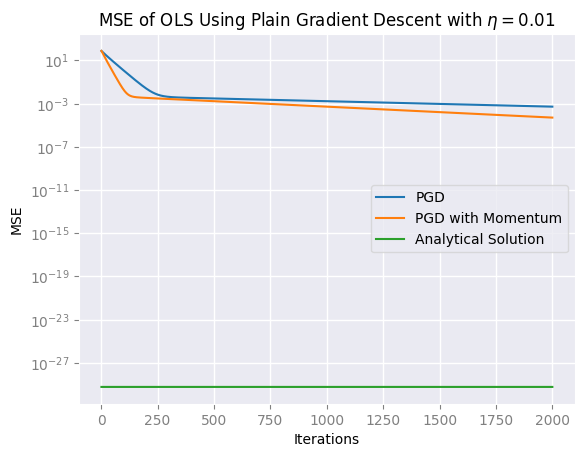

In [5]:
mse_func_of_epochs(
    epochs=plain_iter_range,
    mse=plain_mse,
    mse_mom=plain_mse_mom,
    analytical=analytic_solution,
    fixed_lr=lr,
    sgd=False,
    filename=None,
)

In [6]:
lr = 0.1
n_epochs = 10

analytic_solution = [utils.cost_OLS(X_test, analytic_beta, y_test)] * n_epochs

stochastic_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, lr_schedule="linear", save_info_per_iter=True)
stochastic_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, lr_schedule="linear", save_info_per_iter=True)

stochastic_w_momentum.set_gradient(utils.analytic_grad_OLS)
stochastic_wo_momentum.set_gradient(utils.analytic_grad_OLS)

stochastic_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
stochastic_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)

sgd_info_w_momentum = stochastic_w_momentum.info
sgd_info_wo_momentum = stochastic_wo_momentum.info

sgd_iter_range = np.arange(1, n_epochs+1)

sgd_mse = [0] * n_epochs
sgd_mse_mom = [0] * n_epochs

for i in range(n_epochs):
    sgd_mse[i] = utils.cost_OLS(X_test, [sgd_info_wo_momentum[i]], y_test)
    sgd_mse_mom[i] = utils.cost_OLS(X_test, [sgd_info_w_momentum[i]], y_test)

100%|██████████| 10/10 [00:00<00:00, 14203.54it/s]


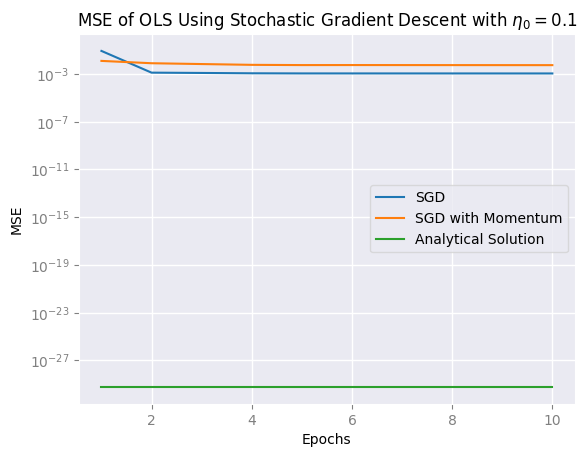

In [7]:
mse_func_of_epochs(
    epochs=sgd_iter_range,
    mse=sgd_mse,
    mse_mom=sgd_mse_mom,
    analytical=analytic_solution,
    fixed_lr=lr,
    sgd=True,
    filename=None,
)

In [24]:
lr = 0.1
n_epochs = 10

stochastic_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, lr_schedule="linear", save_info_per_iter=True)
stochastic_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, lr_schedule="linear", save_info_per_iter=True)
adagrad_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, tuner="adagrad", save_info_per_iter=True)
adagrad_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="adagrad", save_info_per_iter=True)
rmsprop_w_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.5, tuner="rmsprop", save_info_per_iter=True)
rmsprop_wo_momentum = Stochastic(lr=lr, M=4, n_epochs=n_epochs, momentum=0.0, tuner="rmsprop", save_info_per_iter=True)
adam = Stochastic(lr=0.2, M=4, n_epochs=n_epochs, momentum=0.0, tuner="adam", save_info_per_iter=True)

stochastic_w_momentum.set_gradient(utils.analytic_grad_OLS)
stochastic_wo_momentum.set_gradient(utils.analytic_grad_OLS)
adagrad_w_momentum.set_gradient(utils.analytic_grad_OLS)
adagrad_wo_momentum.set_gradient(utils.analytic_grad_OLS)
rmsprop_w_momentum.set_gradient(utils.analytic_grad_OLS)
rmsprop_wo_momentum.set_gradient(utils.analytic_grad_OLS)
adam.set_gradient(utils.analytic_grad_OLS)

stochastic_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
stochastic_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adagrad_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adagrad_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
rmsprop_w_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
rmsprop_wo_momentum.gradient_descent(X_train, [np.copy(beta)], y_train)
adam.gradient_descent(X_train, [np.copy(beta)], y_train)

sgd_info_w_momentum = stochastic_w_momentum.info
sgd_info_wo_momentum = stochastic_wo_momentum.info
adagrad_info_w_momentum = adagrad_w_momentum.info
adagrad_info_wo_momentum = adagrad_wo_momentum.info
rmsprop_info_w_momentum = rmsprop_w_momentum.info
rmsprop_info_wo_momentum = rmsprop_wo_momentum.info
adam_info = adam.info

iter_range = np.arange(1, n_epochs+1)

sgd_mse = [0] * n_epochs
sgd_mse_mom = [0] * n_epochs
adagrad_mse = [0] * n_epochs
adagrad_mse_mom = [0] * n_epochs
rmsprop_mse = [0] * n_epochs
rmsprop_mse_mom = [0] * n_epochs
adam_mse = [0] * n_epochs

for i in range(n_epochs):
    sgd_mse[i] = utils.cost_OLS(X_test, [sgd_info_wo_momentum[i]], y_test)
    sgd_mse_mom[i] = utils.cost_OLS(X_test, [sgd_info_w_momentum[i]], y_test)
    adagrad_mse[i] = utils.cost_OLS(X_test, [adagrad_info_wo_momentum[i]], y_test)
    adagrad_mse_mom[i] = utils.cost_OLS(X_test, [adagrad_info_w_momentum[i]], y_test)
    rmsprop_mse[i] = utils.cost_OLS(X_test, [rmsprop_info_wo_momentum[i]], y_test)
    rmsprop_mse_mom[i] = utils.cost_OLS(X_test, [rmsprop_info_w_momentum[i]], y_test)
    adam_mse[i] = utils.cost_OLS(X_test, [adam_info[i]], y_test)

100%|██████████| 10/10 [00:00<00:00, 4533.40it/s]


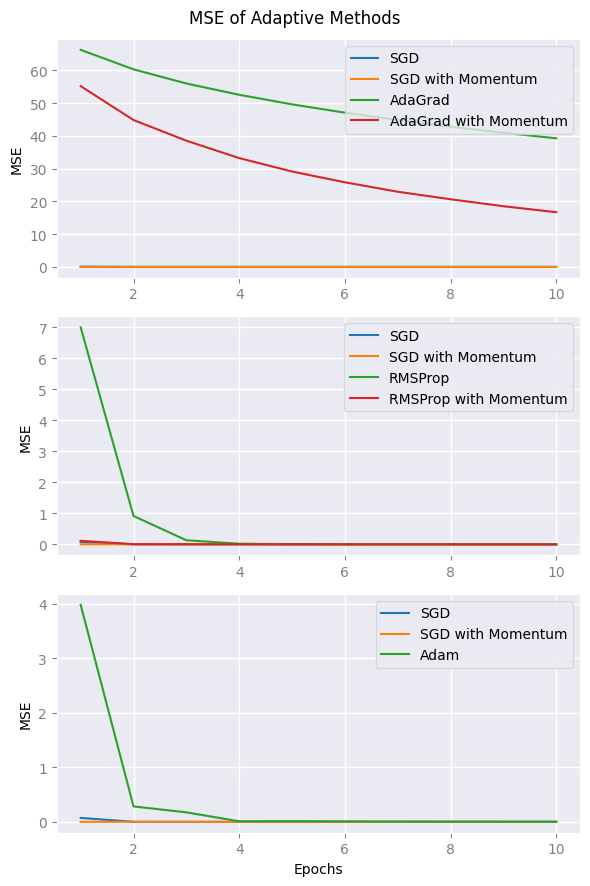

In [ ]:
three_stacked_subplots(
    epochs=sgd_iter_range,
    sgd=sgd_mse,
    sgd_mom=sgd_mse_mom,
    adagrad=adagrad_mse,
    adagrad_mom=adagrad_mse_mom,
    rms=rmsprop_mse,
    rms_mom=rmsprop_mse_mom,
    adam=adam_mse,
    lr=lr,
    plot_lr=False,
    save=True,
)